### 문제


In [1]:
! # 시작시간 체크

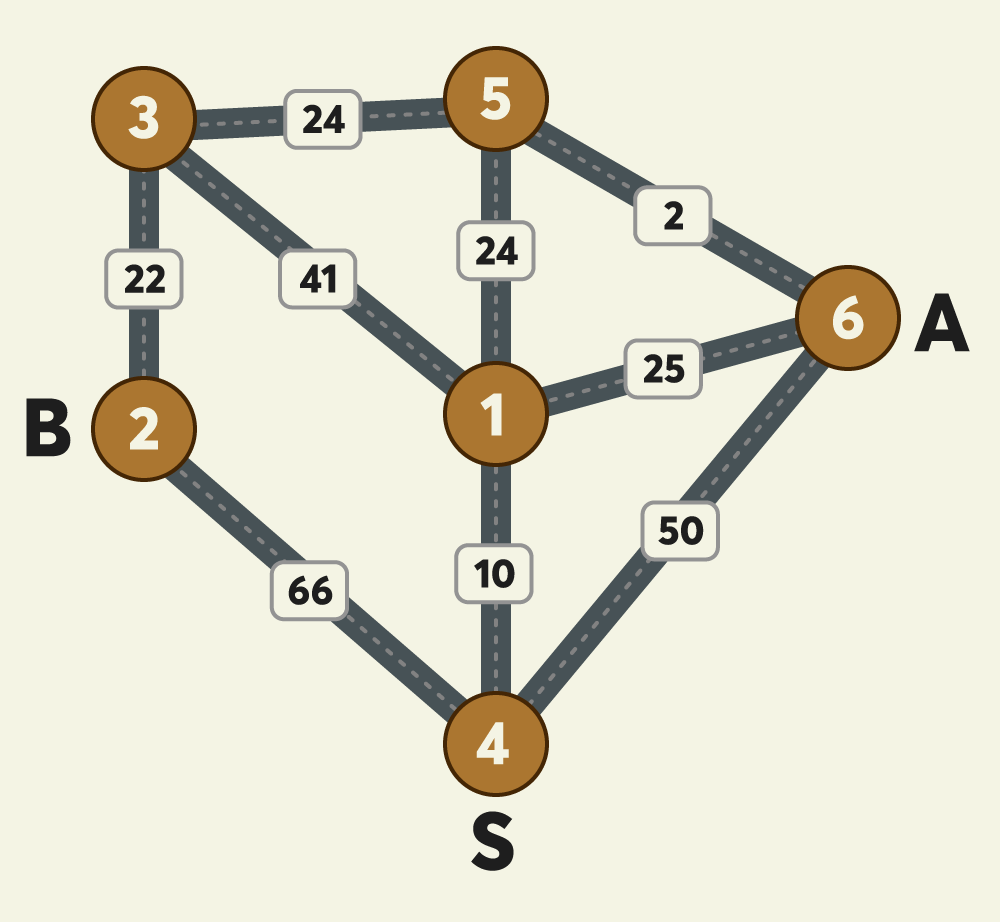

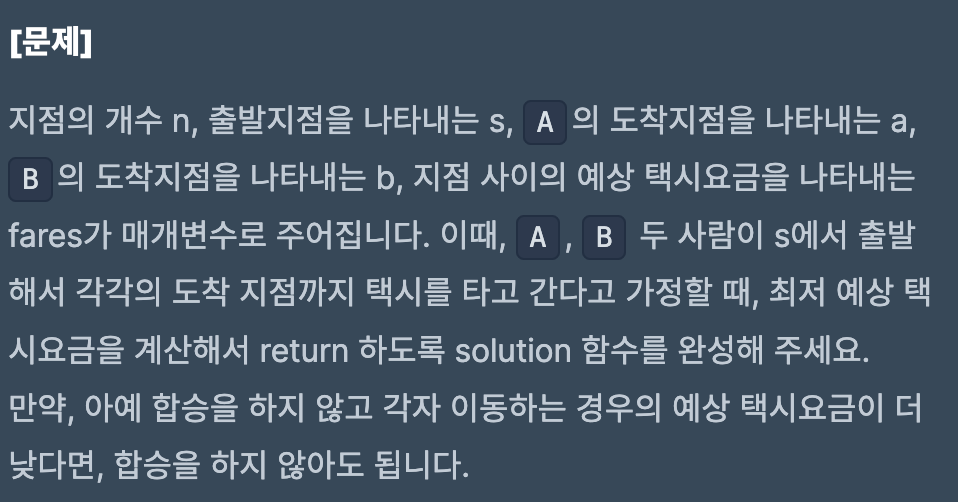

문제 요약

    

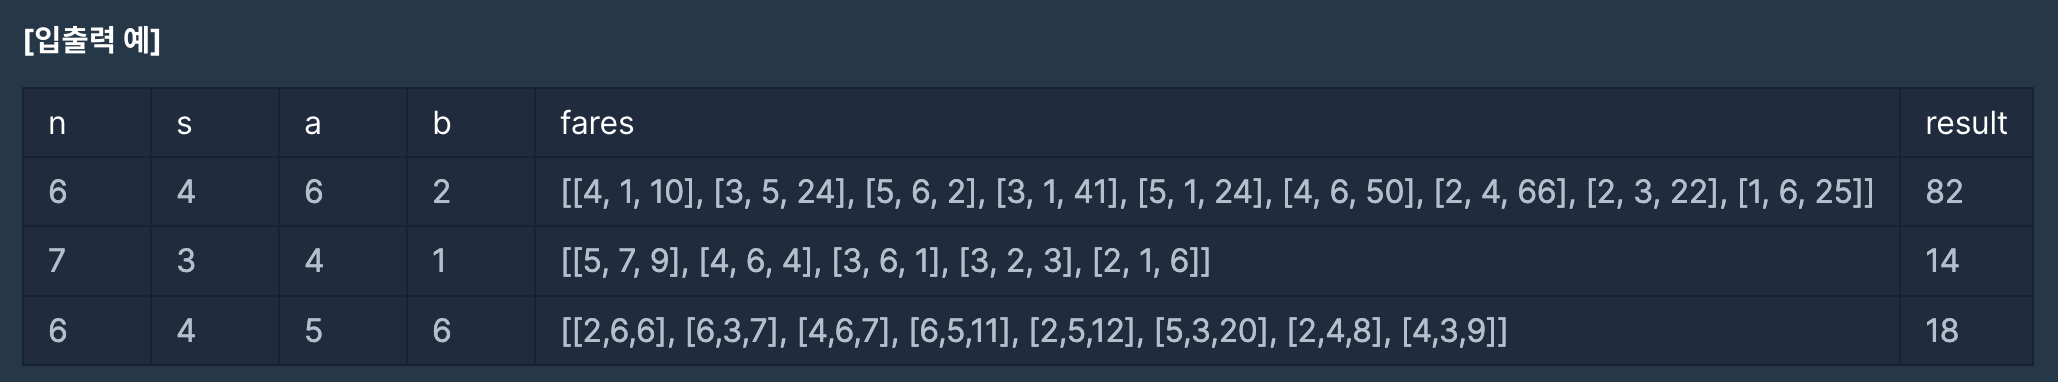

상상코딩

    

In [ ]:
! # 끝 시간 체크

### 풀이

In [ ]:
def solution(n, s, a, b, fares):
    s-=1;a-=1;b-=1
    graph = [[1e9] * n for _ in range(n)]
    for i in range(n):
        graph[i][i] = 0
    for u,v,w in fares:
        graph[u-1][v-1] = graph[v-1][u-1] = w

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if graph[i][j] > graph[i][k] + graph[k][j]:
                    graph[i][j] = graph[i][k] + graph[k][j]
    ans=1e9
    for k in range(n):
        ans=min(ans,graph[s][k] + graph[k][a] + graph[k][b])
return ans

#### 다익스트라

In [ ]:
from collections import defaultdict
import heapq

def solution(n, s, a, b, fares):
    dic = defaultdict(list)
    for st, ed, co in fares:
        dic[st].append((co, ed))
        dic[ed].append((co, st))
    ans = []
    for i in range(1, n+1):
        Q = [(0, i)]
        visited = [True] * (n+1)
        dp = [float('inf')] * (n+1)
        dp[i] = 0
        while Q:
            co, des = heapq.heappop(Q)
            if visited[des]:
                visited[des] = False
                for cost, destination in dic[des]:
                    dp[destination] = min(cost + dp[des], dp[destination])
                    heapq.heappush(Q, (dp[destination], destination))
        ans.append(dp[a] + dp[b] + dp[s])

    return min(ans)

In [ ]:
from heapq import heappop, heappush

INF = int(1e9)
graph = [[]]

def preprocess(n, fares):
    global graph
    graph = [[] for i in range(n+1)]

    for fare in fares:
        src, dst, cost = fare[0], fare[1], fare[2]
        graph[src].append([dst, cost])
        graph[dst].append([src, cost])

def dijkstra(src, dst):
    global graph
    n = len(graph)
    table = [INF for i in range(n)]
    table[src] = 0
    pq = [[0, src]]

    while pq:
        w, x = heappop(pq)

        if table[x] < w: continue

        for item in graph[x]:
            nx, ncost = item[0], item[1]
            ncost += w
            if ncost < table[nx]:
                table[nx] = ncost
                heappush(pq, [ncost, nx])
    
    return table[dst]

def solution(n, s, a, b, fares):
    preprocess(n, fares)
    cost = dijkstra(s, a) + dijkstra(s, b)

    for i in range(1, n+1):
        if s != i:
            cost = min(cost, dijkstra(s, i) + dijkstra(i, a) + dijkstra(i, b))
    
    return cost

### 주석 달린 풀이

### 연습

In [7]:
n,s,a,b=6,4,6,2
fares=[[4, 1, 10], [3, 5, 24], [5, 6, 2], [3, 1, 41], [5, 1, 24], [4, 6, 50], [2, 4, 66], [2, 3, 22], [1, 6, 25]]

In [8]:
s-=1;a-=1;b-=1
graph = [[1e9] * n for _ in range(n)]
for i in range(n):
    graph[i][i] = 0

for f in fares:
    u,v,w = f
    graph[u-1][v-1]=graph[v-1][u-1]=w

for k in range(n):
    for i in range(n):
        for j in range(n):
            if graph[i][j] > graph[i][k] + graph[k][j]:
                graph[i][j] = graph[i][k] + graph[k][j]
ans=1e9
for k in range(n):
    ans = min(ans, graph[s][k] + graph[k][a] + graph[k][b])
print(ans)

82


In [23]:
li = """테스트 1 〉	통과 (145.64ms, 10.5MB)
테스트 2 〉	통과 (487.47ms, 11.1MB)
테스트 3 〉	통과 (1254.46ms, 11.4MB)
테스트 4 〉	통과 (1121.22ms, 11.5MB)
테스트 5 〉	통과 (1133.48ms, 11.5MB)
테스트 6 〉	통과 (1245.82ms, 11.5MB)
테스트 7 〉	통과 (1311.41ms, 13.8MB)
테스트 8 〉	통과 (1166.99ms, 14MB)
테스트 9 〉	통과 (1320.88ms, 13MB)
테스트 10 〉	통과 (1236.73ms, 12.8MB)
테스트 11 〉	통과 (1208.91ms, 12.9MB)
테스트 12 〉	통과 (1164.29ms, 12.7MB)
테스트 13 〉	통과 (1169.55ms, 12.7MB)
테스트 14 〉	통과 (1279.01ms, 12.8MB)
테스트 15 〉	통과 (1171.01ms, 12.7MB)
테스트 16 〉	통과 (1244.16ms, 11.4MB)
테스트 17 〉	통과 (2288.56ms, 11.4MB)
테스트 18 〉	통과 (1130.37ms, 11.1MB)
테스트 19 〉	통과 (1148.28ms, 11.5MB)
테스트 20 〉	통과 (1267.17ms, 11.7MB)
테스트 21 〉	통과 (1261.32ms, 11.6MB)
테스트 22 〉	통과 (1282.54ms, 12.7MB)
테스트 23 〉	통과 (1277.26ms, 12.8MB)
테스트 24 〉	통과 (2329.36ms, 12.8MB)
테스트 25 〉	통과 (1116.39ms, 11.2MB)
테스트 26 〉	통과 (2101.94ms, 10.9MB)
테스트 27 〉	통과 (2009.06ms, 10.4MB)
테스트 28 〉	통과 (1049.56ms, 10.5MB)
테스트 29 〉	통과 (143.43ms, 10.4MB)
테스트 30 〉	통과 (158.17ms, 10.4MB)""".split('\n')

f_test=[float(i.split('(')[1].split('ms')[0]) for i in li]
avg=sum(e_test)/len(li)
print(f"플로이드 워셜 효율성 테스트 평균: {avg:.2f}ms, 최대 {max(e_test)}ms")

플로이드 워셜 효율성 테스트 평균: 1088.13ms, 최대 3762.54ms


In [24]:
li = """테스트 1 〉	통과 (65.25ms, 10.3MB)
테스트 2 〉	통과 (304.92ms, 10.6MB)
테스트 3 〉	통과 (117.10ms, 10.4MB)
테스트 4 〉	통과 (107.28ms, 10.3MB)
테스트 5 〉	통과 (115.51ms, 10.2MB)
테스트 6 〉	통과 (121.22ms, 10.2MB)
테스트 7 〉	통과 (3410.31ms, 16.1MB)
테스트 8 〉	통과 (3762.54ms, 16.2MB)
테스트 9 〉	통과 (3004.86ms, 16.1MB)
테스트 10 〉	통과 (3152.06ms, 16MB)
테스트 11 〉	통과 (2941.39ms, 16.1MB)
테스트 12 〉	통과 (1805.87ms, 13.1MB)
테스트 13 〉	통과 (1951.87ms, 13.2MB)
테스트 14 〉	통과 (1807.87ms, 13.2MB)
테스트 15 〉	통과 (1917.92ms, 13.1MB)
테스트 16 〉	통과 (94.64ms, 10.2MB)
테스트 17 〉	통과 (94.83ms, 10.4MB)
테스트 18 〉	통과 (92.07ms, 10.4MB)
테스트 19 〉	통과 (269.25ms, 10.5MB)
테스트 20 〉	통과 (411.36ms, 10.7MB)
테스트 21 〉	통과 (411.02ms, 10.6MB)
테스트 22 〉	통과 (1760.41ms, 13.1MB)
테스트 23 〉	통과 (1931.13ms, 13.1MB)
테스트 24 〉	통과 (1920.09ms, 13.2MB)
테스트 25 〉	통과 (73.57ms, 10.2MB)
테스트 26 〉	통과 (62.83ms, 10.2MB)
테스트 27 〉	통과 (443.77ms, 10.7MB)
테스트 28 〉	통과 (415.27ms, 10.7MB)
테스트 29 〉	통과 (38.62ms, 10.4MB)
테스트 30 〉	통과 (39.09ms, 10.2MB)""".split('\n')

d_test=[float(i.split('(')[1].split('ms')[0]) for i in li]
avg=sum(e_test)/len(li)
print(f"다익스트라 효율성 테스트 평균: {avg:.2f}ms, 최대 {max(e_test)}ms")

다익스트라 효율성 테스트 평균: 1088.13ms, 최대 3762.54ms


In [45]:
import pandas as pd

In [46]:
df = pd.DataFrame({'Floyd_Warshall':f_test,'Dijkstra':d_test})

In [50]:
df.index = df.index+1

In [53]:
df = df.rename(index={'index':'test'})

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
plt.style.use("ggplot")

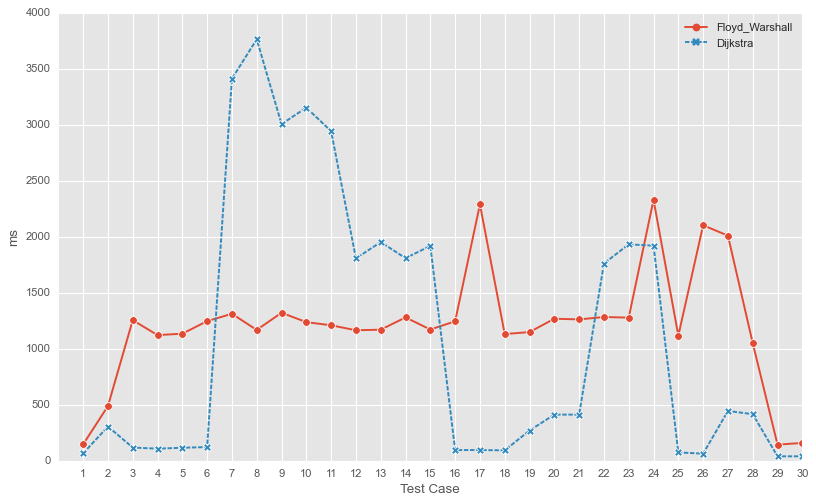

In [77]:
fig, ax = plt.subplots(1, 1,figsize=(12, 7))
sns.lineplot(data=df, ax=ax, markers=True)
plt.xlabel('Test Case')
plt.ylabel('ms')
plt.xticks(list(range(1,31)))
plt.show()

In [71]:
df.describe().T.iloc[:,[1,3,4,6,7]]

,mean,min,25%,75%,max
Floyd_Warshall,1207.481333,143.43,1131.1475,1278.5725,2329.36
Dijkstra,1088.130667,38.62,97.9425,1919.5475,3762.54
